In [21]:
#Imports
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal 
from IPython.display import Image, display

In [22]:
class Portfolio(TypedDict):
    amount_usd: float
    total: float
    initial_usd: float
    target_currency: Literal["EUR", "INR"]

In [23]:
def convert_usd_to_inr(portfolio: Portfolio) -> Portfolio:
    portfolio['total'] = portfolio['amount_usd'] * 82.0
    return portfolio

def convert_usd_to_eur(portfolio: Portfolio) -> Portfolio:
    portfolio['total'] = portfolio['amount_usd'] * 0.92
    return portfolio

def calc_total_usd(portfolio: Portfolio) -> Portfolio:
    portfolio['amount_usd'] = portfolio['initial_usd']*1.08
    return portfolio

def choose_conversion(portfolio: Portfolio) -> str:
    return portfolio['target_currency']

In [24]:
builder = StateGraph(Portfolio)

builder.add_node("CalcUSD", calc_total_usd)
builder.add_node("CalcINR", convert_usd_to_inr)
builder.add_node("CalcEUR", convert_usd_to_eur)

builder.add_edge(START, "CalcUSD")
builder.add_conditional_edges(
    "CalcUSD", 
    choose_conversion,
    {
        "INR": "CalcINR",
        "EUR": "CalcEUR"
    }
)
builder.add_edge("CalcINR", END)
builder.add_edge("CalcEUR", END)
#builder.add_edge(["Calc_USD", "CalcEUR"], END)

currencyGraph = builder.compile()

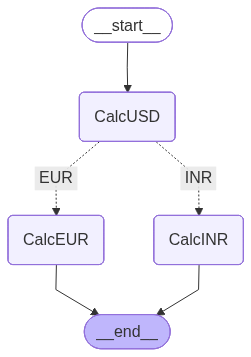

In [25]:
display(Image(currencyGraph.get_graph().draw_mermaid_png()))

In [27]:
currencyGraph.invoke({"initial_usd": 1000, "target_currency": "INR"})

{'amount_usd': 1080.0,
 'total': 88560.0,
 'initial_usd': 1000,
 'target_currency': 'INR'}

In [31]:
currencyGraph.invoke({"initial_usd": 1000, "target_currency": "EUR"})

{'amount_usd': 1080.0,
 'total': 993.6,
 'initial_usd': 1000,
 'target_currency': 'EUR'}